In [ ]:
 import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier as DTC,DecisionTreeRegressor as DTR,export_graphviz
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LogisticRegression as LR,LinearRegression as LinR
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,r2_score


In [ ]:
df=pd.read_csv('breast_cancer.csv')

In [ ]:
df.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [ ]:
# Create dummy variables for 'Class' using pandas' get_dummies() function
df_dummies = pd.get_dummies(df['Class'], drop_first=True)

# Concatenate the dummy variables with the original DataFrame
df = pd.concat([df, df_dummies], axis=1)

In [ ]:
df.columns=['Clump Thickness',     'Uniformity of Cell Size',
          'Uniformity of Cell Shape',           'Marginal Adhesion',
       'Single Epithelial Cell Size',                 'Bare Nuclei',
                   'Bland Chromatin',             'Normal Nucleoli',
                           'Mitoses',                       'Class',
                                   'Class_04']

In [ ]:
df.dtypes

Clump Thickness                int64
Uniformity of Cell Size        int64
Uniformity of Cell Shape       int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int64
Bland Chromatin                int64
Normal Nucleoli                int64
Mitoses                        int64
Class                          int64
Class_04                       uint8
dtype: object

In [ ]:
df.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class,Class_04
0,5,1,1,1,2,1,3,1,1,2,0
1,5,4,4,5,7,10,3,2,1,2,0
2,3,1,1,1,2,2,3,1,1,2,0
3,6,8,8,1,3,4,3,7,1,2,0
4,4,1,1,3,2,1,3,1,1,2,0


<Axes: >

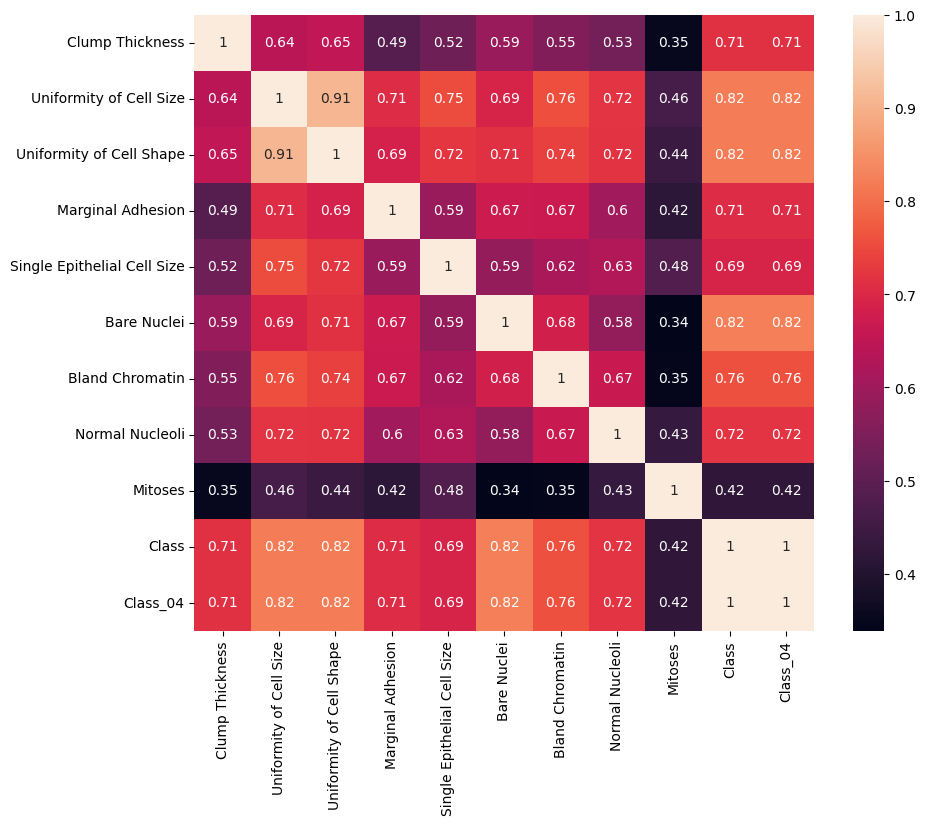

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

In [ ]:
X=df.iloc[:,:-2]
y=df.Class_04
x_train,x_test,y_train,y_test=tts(X,y,test_size=0.3,random_state=69)

In [ ]:
log_reg=LR().fit(x_train,y_train)

In [ ]:
y_pred_lr=log_reg.predict(x_test)
print(confusion_matrix(y_test,y_pred_lr),"\n")

[[135   7]
 [  3  60]] 



In [ ]:
print("Accuracy on training set for Logistic Regression: {:.3f}".format(log_reg.score(x_train, y_train)))
print("Accuracy on test set for Logistic Regression: {:.3f}".format(log_reg.score(x_test, y_test)))

Accuracy on training set for Logistic Regression: 0.981
Accuracy on test set for Logistic Regression: 0.951


In [ ]:
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96       142
           1       0.90      0.95      0.92        63

    accuracy                           0.95       205
   macro avg       0.94      0.95      0.94       205
weighted avg       0.95      0.95      0.95       205



### Decision Tree Classifier

In [ ]:
tree=DTC().fit(x_train,y_train)

In [ ]:
print("Accuracy on training set: {:.3f}".format(tree.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(x_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.927


the accuracy on the training set is 100%—because the leaves are pure,
the tree was grown deep enough that it could perfectly memorize all the labels on the training data. The test set accuracy is slightly worse than for the linear models we looked at previously, which had around 95% accuracy.

In [ ]:
tree=DTC(max_depth=2).fit(x_train,y_train)

In [ ]:
tree=DTC(max_depth=2).fit(x_train,y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(x_test, y_test)))

Accuracy on training set: 0.964
Accuracy on test set: 0.922


In [ ]:
for i in range(1,10):
  tree=DTC(max_depth=i).fit(x_train,y_train)
  print("Training accuracy of Decision Tree Classifier with max_depth={}: {:.2f}".format(
          i, tree.score(x_train, y_train)))
  print("Test accuracy of Decision Tree Classifier with max_depth={}: {:.2f}".format(
          i, tree.score(x_test, y_test)),"\n")

Training accuracy of Decision Tree Classifier with max_depth=1: 0.94
Test accuracy of Decision Tree Classifier with max_depth=1: 0.92 

Training accuracy of Decision Tree Classifier with max_depth=2: 0.96
Test accuracy of Decision Tree Classifier with max_depth=2: 0.92 

Training accuracy of Decision Tree Classifier with max_depth=3: 0.98
Test accuracy of Decision Tree Classifier with max_depth=3: 0.94 

Training accuracy of Decision Tree Classifier with max_depth=4: 0.99
Test accuracy of Decision Tree Classifier with max_depth=4: 0.94 

Training accuracy of Decision Tree Classifier with max_depth=5: 1.00
Test accuracy of Decision Tree Classifier with max_depth=5: 0.93 

Training accuracy of Decision Tree Classifier with max_depth=6: 1.00
Test accuracy of Decision Tree Classifier with max_depth=6: 0.93 

Training accuracy of Decision Tree Classifier with max_depth=7: 1.00
Test accuracy of Decision Tree Classifier with max_depth=7: 0.93 

Training accuracy of Decision Tree Classifier wi

Here we set max_depth=4, meaning only **four** consecutive questions can be asked, because we can see from above that the model with max_depth has highest test and train accuracy.

In [ ]:
tree=DTC(max_depth=4).fit(x_train,y_train)

In [ ]:
export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"],
                feature_names=X.columns, impurity=False, filled=True)

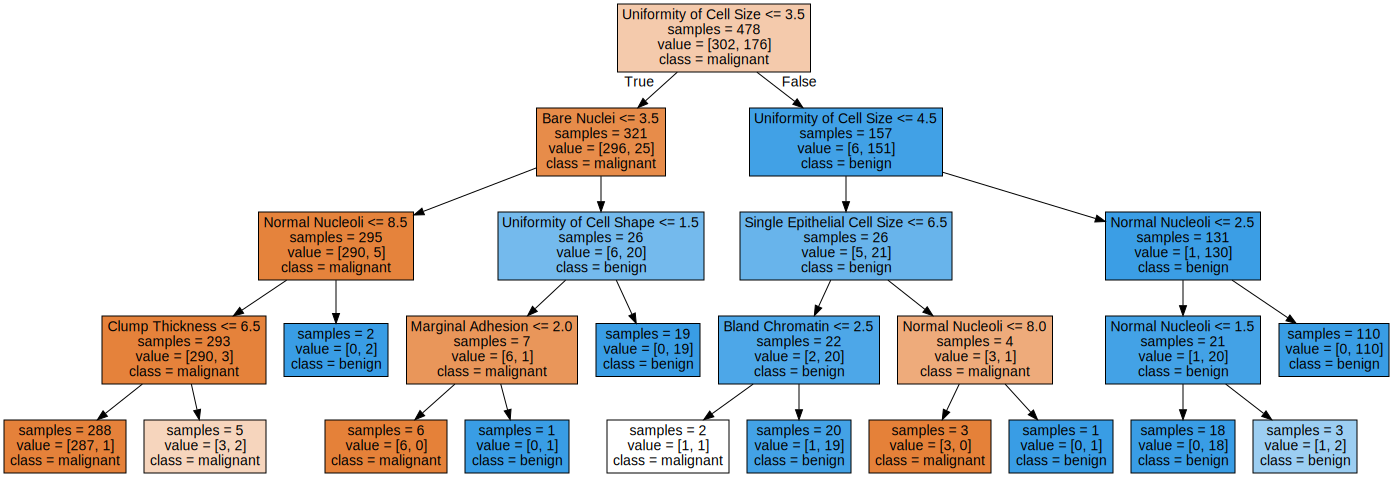

In [ ]:
import graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

Feature importances:  [0.007 0.778 0.035 0.008 0.014 0.127 0.003 0.028 0.   ] 
 Index(['Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses'],
      dtype='object')


<Axes: >

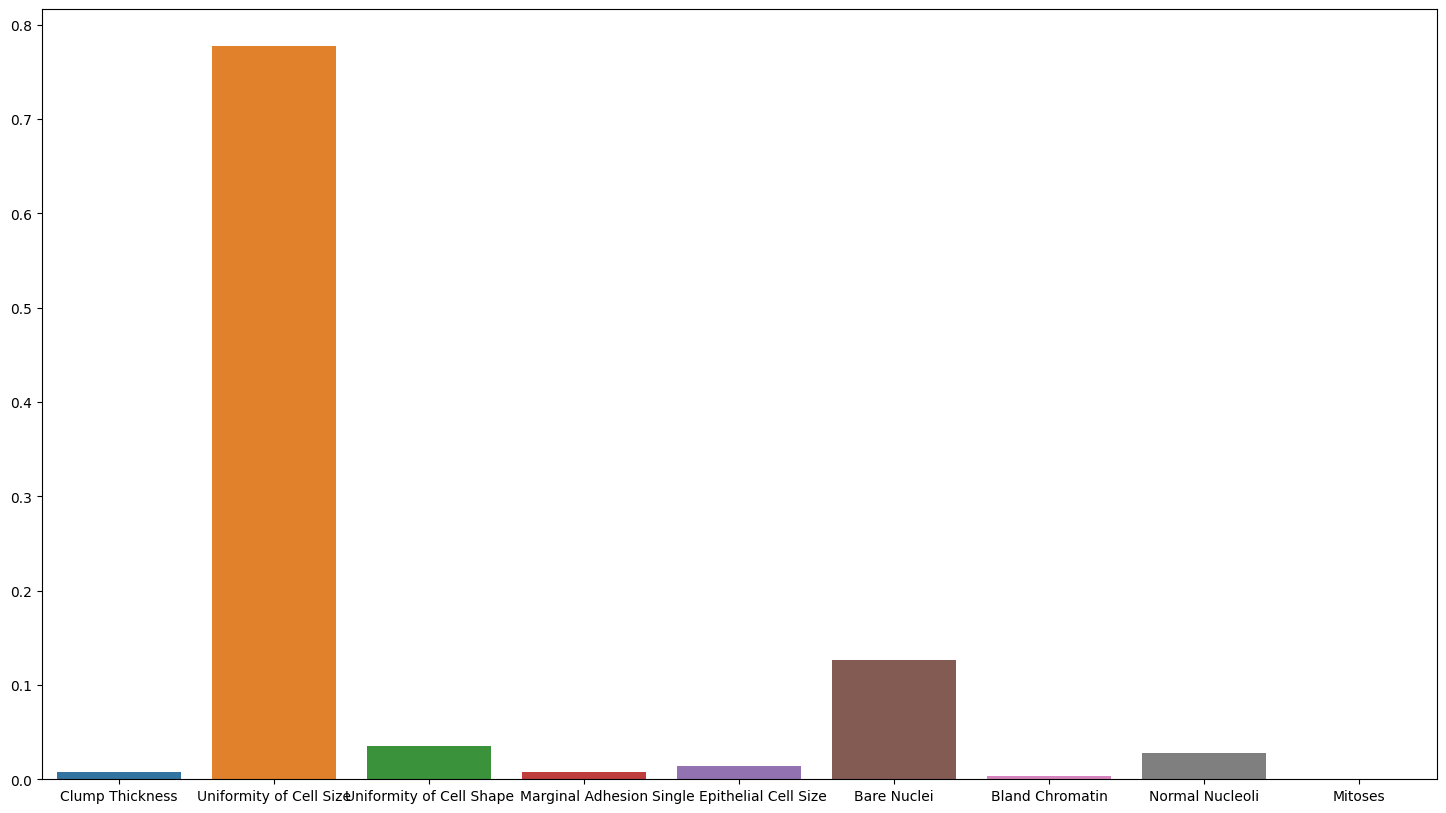

In [ ]:
print("Feature importances: ",tree.feature_importances_.round(3),"\n",X.columns)
plt.figure(figsize=(18,10))
sns.barplot(x=X.columns,y=tree.feature_importances_)

### Decision Tree Regressor

In [ ]:
from sklearn.datasets import load_diabetes

In [ ]:
data=load_diabetes()

In [ ]:
X_train, X_test, y_train, y_test = tts(data.data, data.target, test_size=0.3, random_state=42)

In [ ]:
# Fit a linear regression model
lr = LinR().fit(X_train, y_train)
print("R-Squared on training set for Logistic Regression: {:.3f}".format(lr.score(X_train, y_train)))
print("R-Squared on test set for Logistic Regression: {:.3f}".format(lr.score(X_test, y_test)))

R-Squared on training set for Logistic Regression: 0.524
R-Squared on test set for Logistic Regression: 0.477


In [ ]:
for i in range(1,9):
  tree=DTR(max_depth=i).fit(X_train,y_train)
  print("R-Squared of Training data for  Decision Tree Regressor with max_depth={}: {:.2f}".format(
          i, tree.score(X_train, y_train)))
  print("R-Squared of Test data for  Decision Tree Regressor with max_depth={}: {:.2f}".format(
          i, tree.score(X_test, y_test)),"\n")

R-Squared of Training data for  Decision Tree Regressor with max_depth=1: 0.30
R-Squared of Test data for  Decision Tree Regressor with max_depth=1: 0.21 

R-Squared of Training data for  Decision Tree Regressor with max_depth=2: 0.44
R-Squared of Test data for  Decision Tree Regressor with max_depth=2: 0.36 

R-Squared of Training data for  Decision Tree Regressor with max_depth=3: 0.53
R-Squared of Test data for  Decision Tree Regressor with max_depth=3: 0.33 

R-Squared of Training data for  Decision Tree Regressor with max_depth=4: 0.60
R-Squared of Test data for  Decision Tree Regressor with max_depth=4: 0.31 

R-Squared of Training data for  Decision Tree Regressor with max_depth=5: 0.68
R-Squared of Test data for  Decision Tree Regressor with max_depth=5: 0.32 

R-Squared of Training data for  Decision Tree Regressor with max_depth=6: 0.75
R-Squared of Test data for  Decision Tree Regressor with max_depth=6: 0.24 

R-Squared of Training data for  Decision Tree Regressor with max

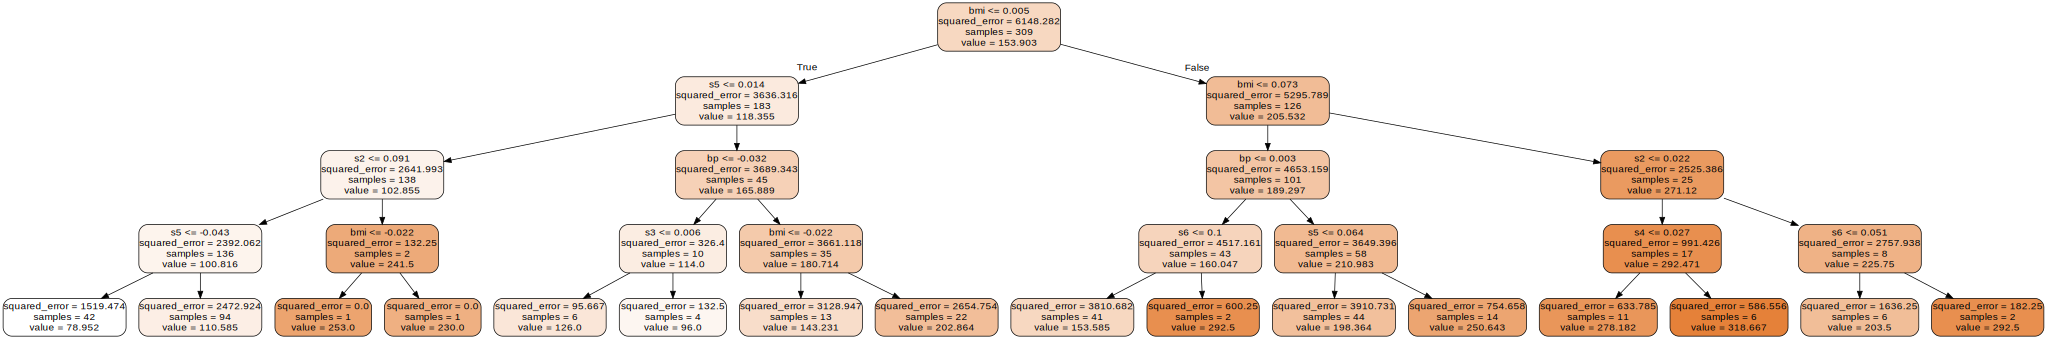

In [ ]:
tree=DTR(max_depth=4).fit(X_train,y_train)
# Export the decision tree as a dot file
export_graphviz(tree, out_file='diabetes_tree.dot', feature_names=data.feature_names, filled=True, rounded=True)

# Convert the dot file to a graph using graphviz
with open('diabetes_tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

Feature importances:  [0.    0.    0.639 0.086 0.    0.055 0.002 0.006 0.169 0.043] 
 ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


<Axes: >

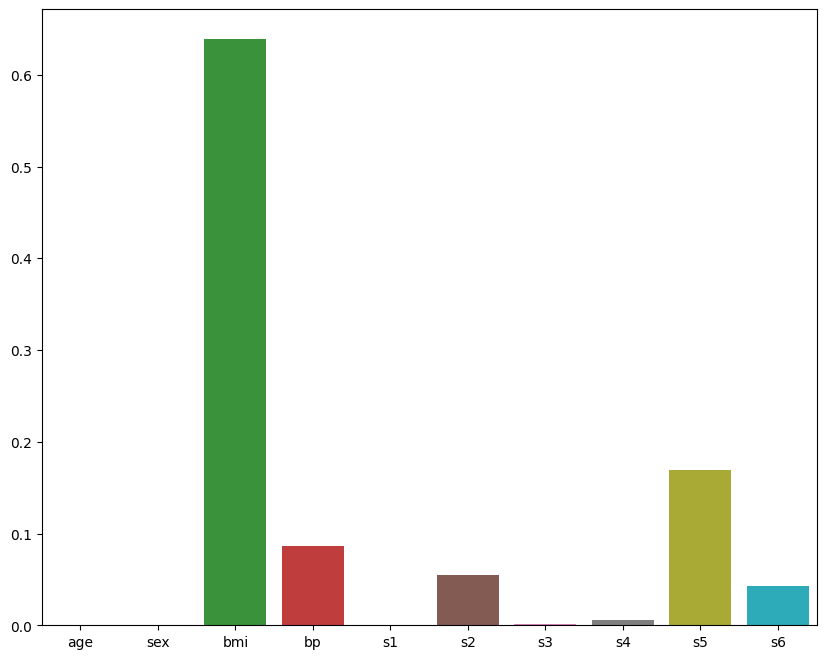

In [ ]:
print("Feature importances: ",tree.feature_importances_.round(3),"\n",data.feature_names)
plt.figure(figsize=(10,8))
sns.barplot(x=data.feature_names,y=tree.feature_importances_)